## Section 1



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/My Drive/carAuction.csv')

2. Explore overall information of the input file

In [5]:
df.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Auction                        10000 non-null  object
 1   Color                          10000 non-null  object
 2   IsBadBuy                       10000 non-null  object
 3   MMRCurrentAuctionAveragePrice  10000 non-null  int64 
 4   Size                           10000 non-null  object
 5   TopThreeAmericanName           10000 non-null  object
 6   VehBCost                       10000 non-null  int64 
 7   VehicleAge                     10000 non-null  int64 
 8   VehOdo                         10000 non-null  int64 
 9   WarrantyCost                   10000 non-null  int64 
 10  WheelType                      10000 non-null  object
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [7]:
df.isnull().sum()

Auction                          0
Color                            0
IsBadBuy                         0
MMRCurrentAuctionAveragePrice    0
Size                             0
TopThreeAmericanName             0
VehBCost                         0
VehicleAge                       0
VehOdo                           0
WarrantyCost                     0
WheelType                        0
dtype: int64

In [8]:
df.shape

(10000, 11)

In [9]:
print(f'The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns')

The DataFrame has 10000 rows and 11 columns


## Section 2
Explore each of the numerical features in the input
file.

In [10]:
df_num_features = df.select_dtypes(exclude=['object'])
df_num_features.dtypes

MMRCurrentAuctionAveragePrice    int64
VehBCost                         int64
VehicleAge                       int64
VehOdo                           int64
WarrantyCost                     int64
dtype: object

In [11]:
df_num_features.describe()

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6116.216000,6720.207200,4.182900,71541.084100,1279.954000
std,2426.340132,1753.796382,1.714509,14688.317704,609.026443
min,0.000000,225.000000,1.000000,4825.000000,462.000000
25%,4255.000000,5435.000000,3.000000,61842.500000,834.000000
50%,6076.000000,6700.000000,4.000000,73506.500000,1169.000000
75%,7732.000000,7880.000000,5.000000,82462.500000,1623.000000
max,27543.000000,29795.000000,9.000000,109734.000000,5913.000000


In [12]:
df_num_features.quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
0.0,0.0,225.0,1.0,4825.0,462.0
0.1,3061.9,4415.0,2.0,50508.1,630.0
0.2,3878.0,5155.0,3.0,58697.0,803.0
0.3,4625.0,5700.0,3.0,64604.5,920.0
0.4,5388.0,6195.0,4.0,69558.2,1023.0
0.5,6076.0,6700.0,4.0,73506.5,1169.0
0.6,6767.8,7210.0,4.0,77114.0,1341.0
0.7,7421.0,7645.0,5.0,80607.3,1503.0
0.8,8062.0,8141.0,6.0,84469.6,1703.0
0.9,9106.4,8950.0,7.0,88825.2,1974.0


In [13]:
df_corr = df_num_features.corr()

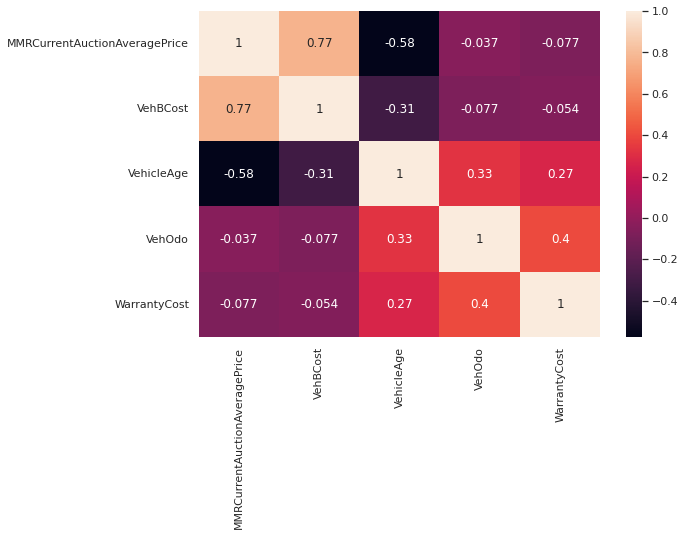

In [16]:
sns.set()
plt.figure(figsize=(9,6))
sns.heatmap(df_corr, annot=True)

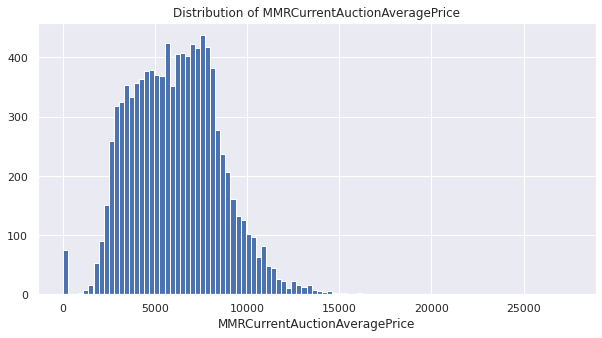

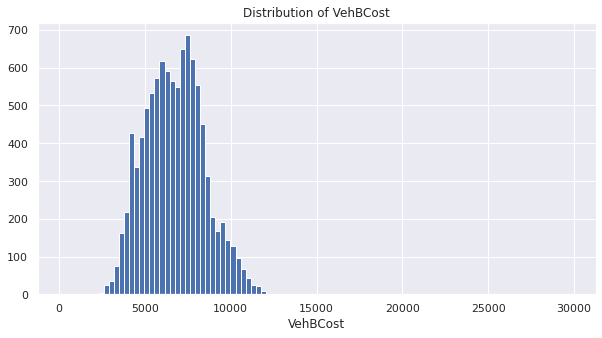

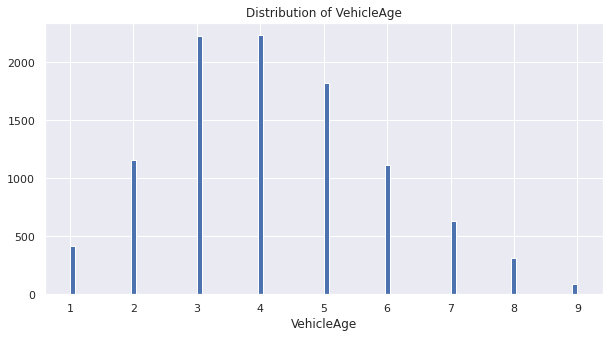

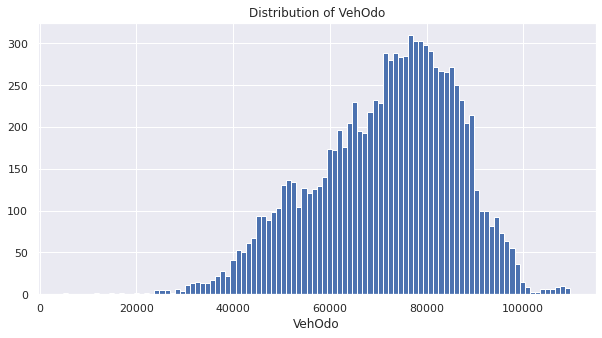

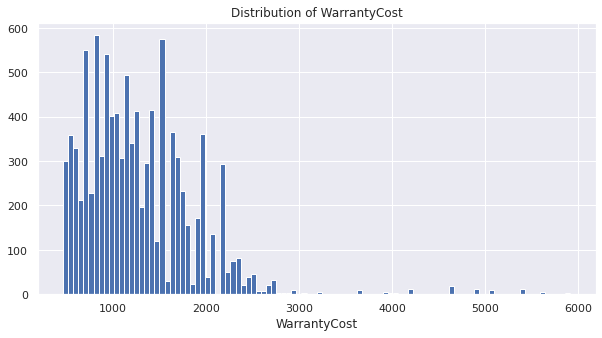

In [21]:
# Make a histogram for each numeric column
for col in df_num_features.columns:
  plt.figure(figsize=[10,5])
  plt.xlabel(col)
  plt.title(f'Distribution of {col}')
  plt.grid(True)
  plt.hist(df_num_features[col], 100) # bin size of 100

It is useful to visualize how the values of a numeric feature are distributed for each value of the target variable. Each numeric value can be seen grouped by the target variable in separate graphs below.

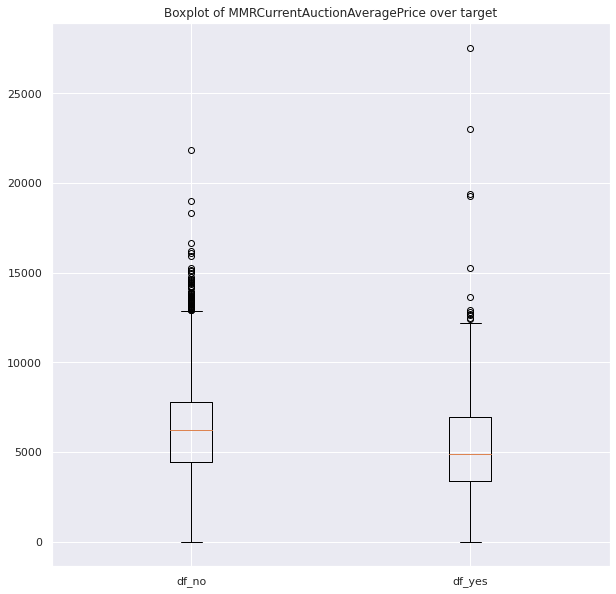

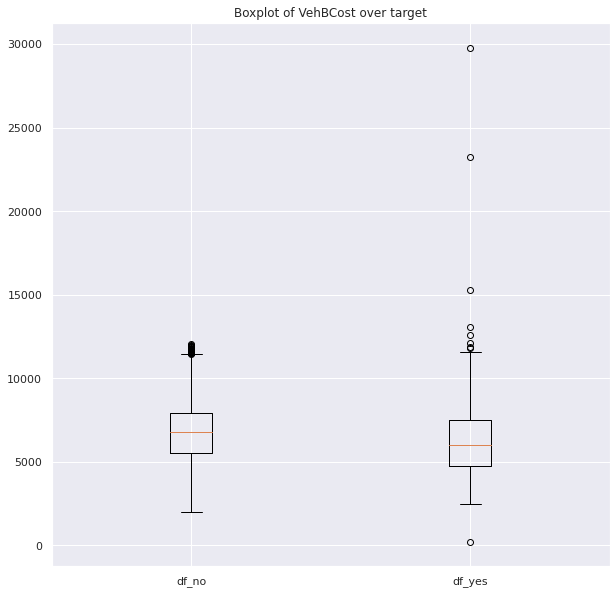

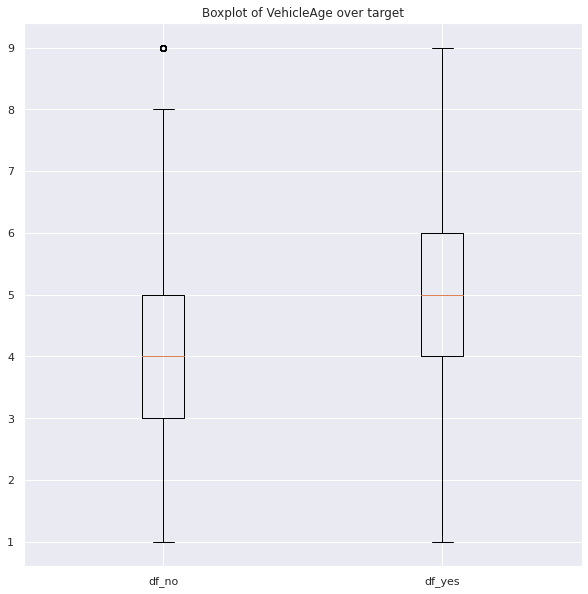

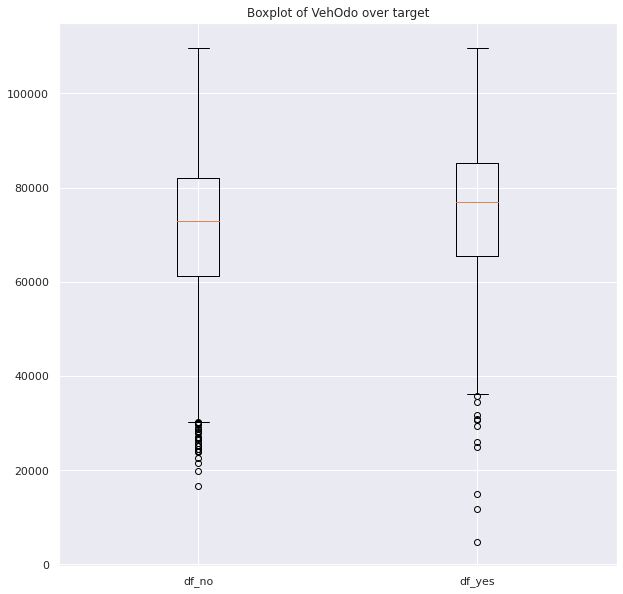

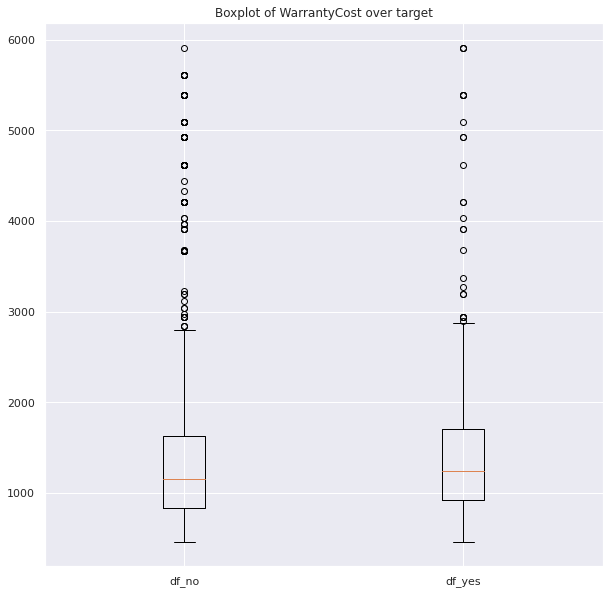

In [55]:
# filter rows by 'no' and 'yes' for target
df_no = df[df['IsBadBuy'] == 'No']
df_yes = df[df['IsBadBuy'] == 'Yes']

# iterate through each column
for col in df_num_features.columns:

  # create a grid of axes (plots)
  fig, ax = plt.subplots(figsize=(10, 10))

  # create an array of vectors of size n where n is the number of categories in target
  data = [df_no[col], df_yes[col]]

  # create a list of labels for ticks on the X axis and set the tick labels for the plot
  xticklist = list()
  xticklist = ['df_no', 'df_yes']
  ax.set_xticklabels(xticklist)

  # create a title for each plot
  ax.set_title(f"Boxplot of {col} over target")

  # generate the boxplots in the subplot
  ax.boxplot(data)

# Section 3
Explore the target variable "IsBadBuy"

In [58]:
# Distribution of the target variable
target_counts = df['IsBadBuy'].value_counts()
target_counts

No     8705
Yes    1295
Name: IsBadBuy, dtype: int64

In [60]:
# save the indices from value_counts for use in the print statement below
target_levels = target_counts.index
target_levels

Index(['No', 'Yes'], dtype='object')

In [63]:
print("In the car auction data:", "\n")
for i in target_levels:
  print(f"{round(target_counts[i]/len(df)*100, 2)}% is {i}", "\n")

In the car auction data: 

87.05% is No 

12.95% is Yes 



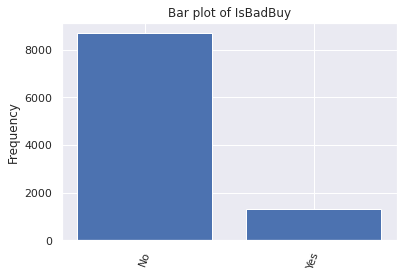

In [64]:
# Create a barplot visualizing the distribution of the target
var_name = 'IsBadBuy'
plt.bar(target_levels, target_counts)
plt.xticks(rotation=70)
plt.title(f"Bar plot of {var_name}")
plt.ylabel('Frequency')
plt.show()

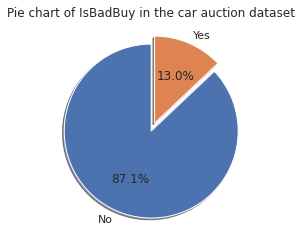

In [68]:
# Pie chart showing the distribution of the target variable
plt.pie(target_counts, explode = (0, 0.1), labels=target_levels, autopct='%.1f%%',
        shadow=True, startangle=90)
plt.title(f"Pie chart of {var_name} in the car auction dataset")
plt.show()

# Section 4
Exploring categorical features

In [70]:
# create a DataFrame keeping only columns with the data type 'object'
df_cat_features = df.select_dtypes(include='object')

# remove the target from the DataFrame
df_cat_features.drop('IsBadBuy', axis=1)

df_cat_features.columns

Index(['Auction', 'Color', 'IsBadBuy', 'Size', 'TopThreeAmericanName',
       'WheelType'],
      dtype='object')

In [71]:
df_cat_features.describe()

,Auction,Color,IsBadBuy,Size,TopThreeAmericanName,WheelType
count,10000,10000,10000,10000,10000,10000
unique,3,16,2,12,4,4
top,MANHEIM,SILVER,No,MEDIUM,GM,Alloy
freq,5610,2114,8705,4201,3484,4921


In [75]:
# Print the frequency count for each categorical feature
for col in df_cat_features.columns:
  print(f"Distibution of {col}", "\n", df_cat_features[col].value_counts(), "\n")

Distibution of Auction 
 MANHEIM    5610
OTHER      2414
ADESA      1976
Name: Auction, dtype: int64 

Distibution of Color 
 SILVER       2114
WHITE        1624
BLUE         1485
GREY         1068
BLACK        1029
RED           797
GOLD          730
GREEN         400
MAROON        295
BEIGE         210
BROWN          66
ORANGE         58
PURPLE         50
YELLOW         32
OTHER          29
NOT AVAIL      13
Name: Color, dtype: int64 

Distibution of IsBadBuy 
 No     8705
Yes    1295
Name: IsBadBuy, dtype: int64 

Distibution of Size 
 MEDIUM         4201
LARGE          1238
MEDIUM SUV     1042
COMPACT         980
VAN             860
LARGE TRUCK     459
SMALL SUV       317
CROSSOVER       250
SPECIALTY       239
LARGE SUV       197
SMALL TRUCK     111
SPORTS          106
Name: Size, dtype: int64 

Distibution of TopThreeAmericanName 
 GM          3484
CHRYSLER    3217
FORD        1671
OTHER       1628
Name: TopThreeAmericanName, dtype: int64 

Distibution of WheelType 
 Alloy       

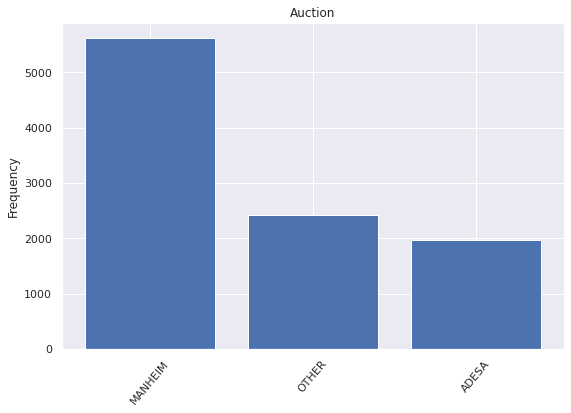

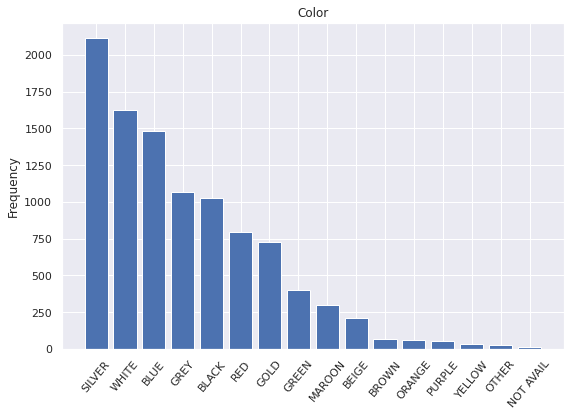

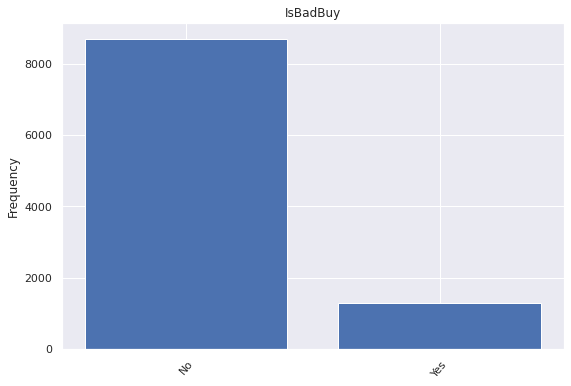

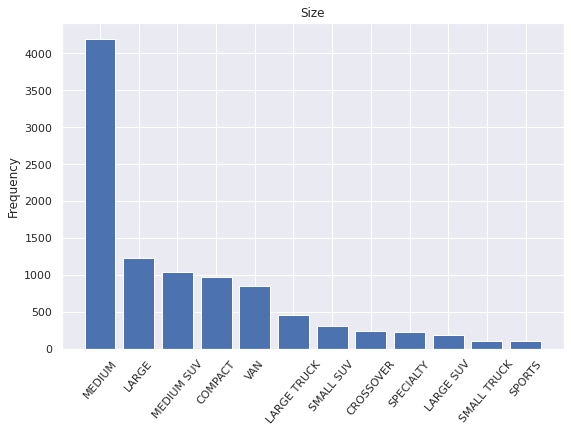

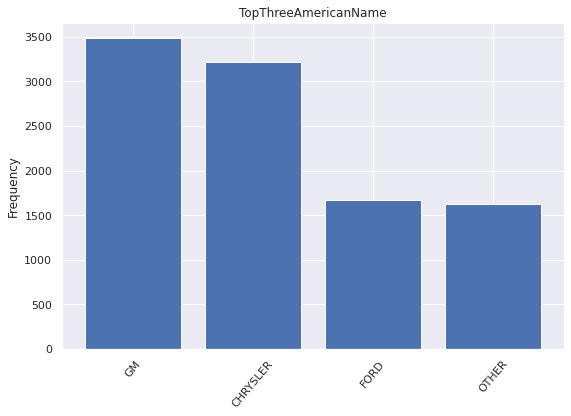

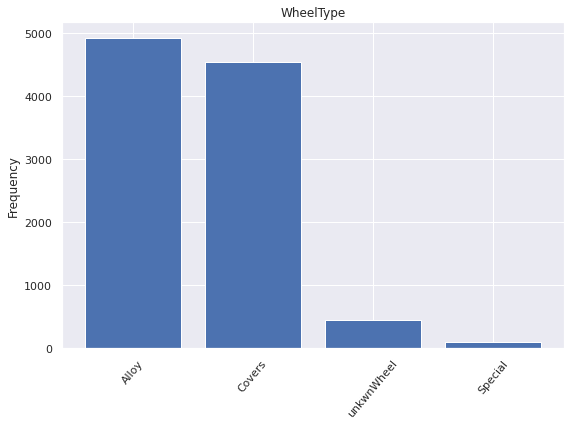

In [81]:
for col in df_cat_features.columns:
  cat_freq = df_cat_features[col].value_counts()
  plt.figure(figsize=(9,6))
  plt.bar(cat_freq.index, cat_freq)
  plt.xticks(rotation=50)
  #plt.title(f"Frequency count of values in {col}")
  plt.ylabel("Frequency")
  plt.title(col)
  plt.show()

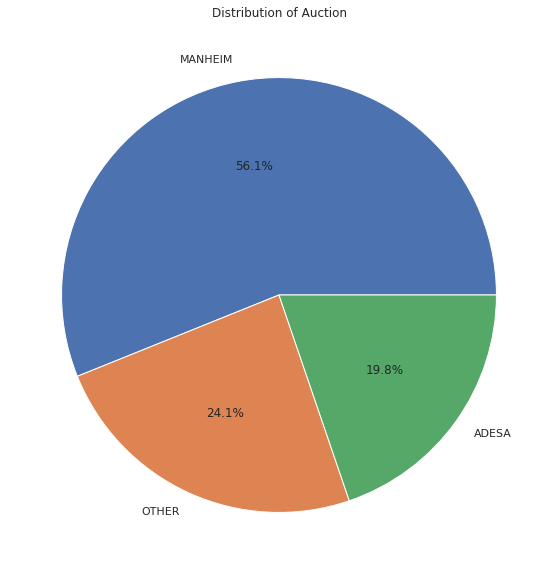

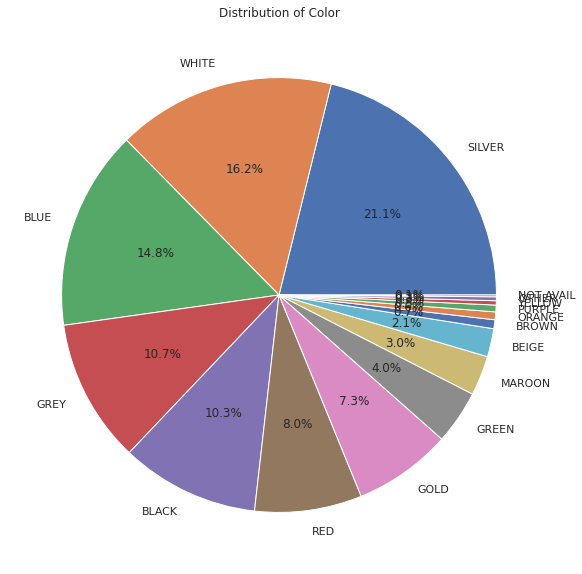

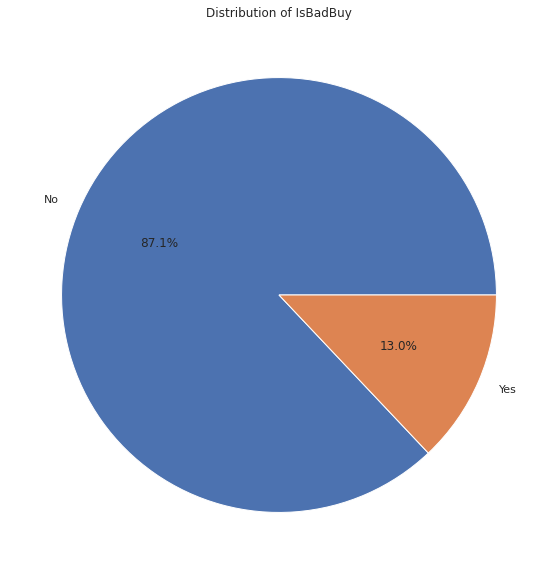

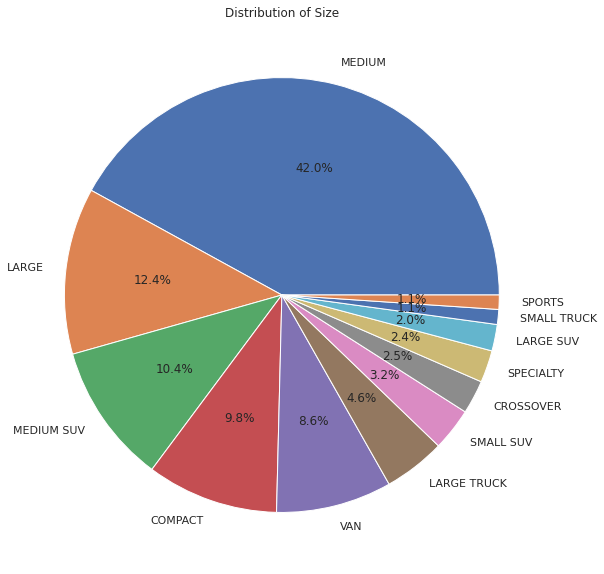

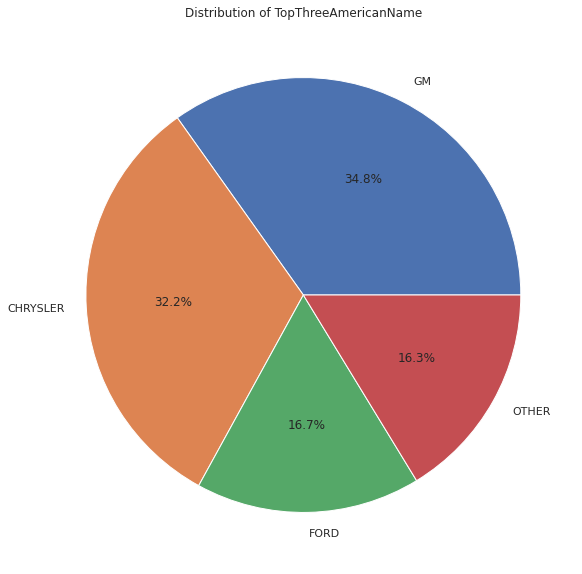

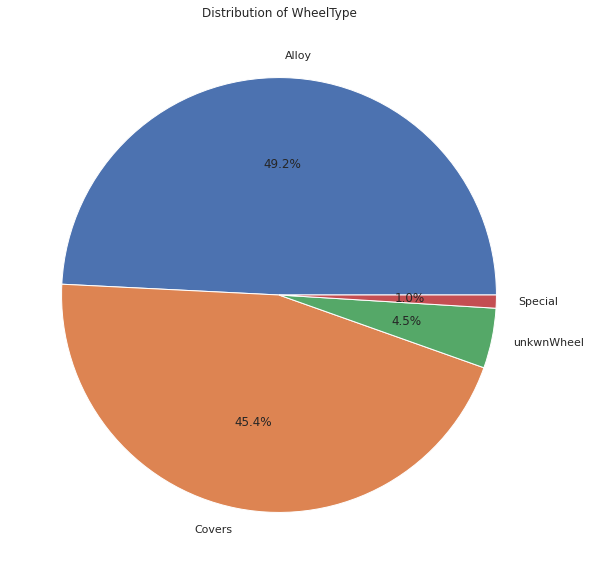

In [83]:
for col in df_cat_features.columns: 
  cat_freq = df_cat_features[col].value_counts()
  plt.figure(figsize=[10,10])
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation=45)
  plt.pie(cat_freq, labels=cat_freq.index, autopct="%.1f%%")
  plt.show()

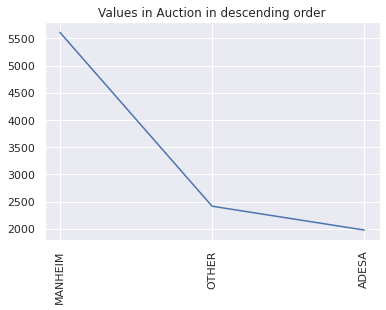

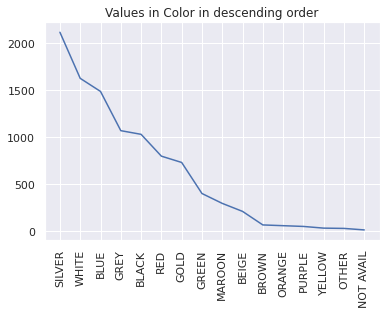

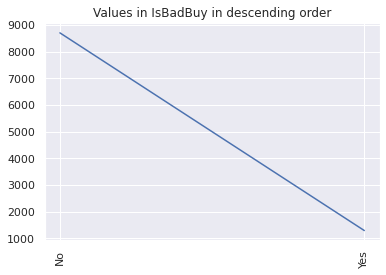

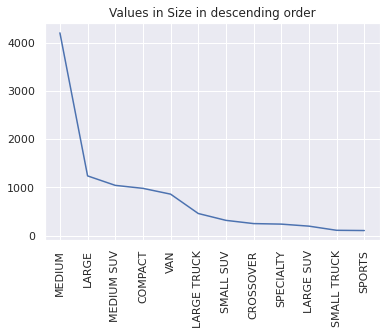

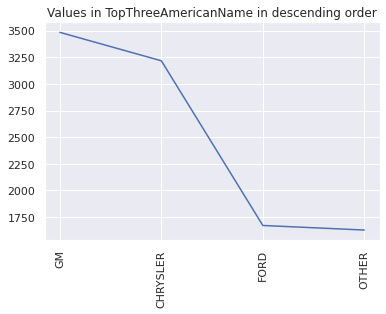

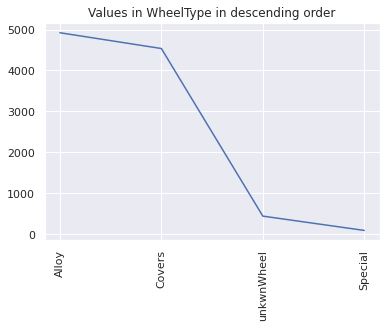

In [90]:
for col in df_cat_features.columns: 
  cat_freq = df_cat_features[col].value_counts()
  fig = plt.figure()
  plt.xticks(rotation='vertical')
  plt.plot(cat_freq.index, cat_freq)
  plt.grid(True)
  plt.title(f"Values in {col} in descending order")